## 1) Introduction

The purpose of this notebook is to make the most of my climbing trip next month. What defines a great climbing trp is of course subjective and requires considerations of many factors. For this exercise, I will consider it a succcons if my friend and I manage to improve our sport climbing grade (mine is currently 6b+ and his 6c).

I have created a web scraping tool to gather data of the climbing destination in question.
This notebook analyses this data in order to make the most of the trip.

## 2) Import libaries

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 3) Load data

In [22]:
path = 'C:/users/vinhe/code/projects/uk-climbing/'
filename = 'Dorset.csv'
area_name = filename[:-4]

df = pd.read_csv(path + filename)
pd.set_option('display.max_rows', 500)

df.head()

,Name,Grade,Stars,Type,Logs,Unnamed: 7,Crag
0,Left Rockfax DescriptionThis much-photographe...,Left Rockfax DescriptionThis much-photographe...,Left Rockfax DescriptionThis much-photographe...,Left Rockfax DescriptionThis much-photographe...,Left Rockfax DescriptionThis much-photographe...,Left Rockfax DescriptionThis much-photographe...,Battleship Back Cliff
1,Pol Pot Had the Lot,6b,-,G,29,R,Battleship Back Cliff
2,Sex Cauldron,7b,-,G,5,R,Battleship Back Cliff
3,Even Better than the Beatles,7b,1,G,30,R,Battleship Back Cliff
4,Arc of a Fridge,7b,1,G,18,R,Battleship Back Cliff


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347 entries, 0 to 4346
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        4347 non-null   object
 1   Grade       4347 non-null   object
 2   Stars       4347 non-null   object
 3   Type        4347 non-null   object
 4   Logs        4347 non-null   object
 5   Unnamed: 7  3052 non-null   object
 6   Crag        4347 non-null   object
dtypes: object(7)
memory usage: 237.9+ KB


## 4) Clean the data

In [26]:
# drop columns where the Name and Grade are identical as these are table headers and not route data

# convert all '-' star routes to '0'
df['Stars'] = df['Stars'].apply(lambda x: x.replace('-', '0'))

# keep only rows where Star rating is a number and not a string, i.e. a table heading
stars = ['0', '1', '2', '3']
routes = df.loc[df['Stars'].isin(stars)]

# drop Unnamed column as it does not contain useful information
#routes.drop(columns='Unnamed: 7', axis=1, inplace=True)

In [27]:
routes.head()

,Name,Grade,Stars,Type,Logs,Unnamed: 7,Crag
1,Pol Pot Had the Lot,6b,0,G,29,R,Battleship Back Cliff
2,Sex Cauldron,7b,0,G,5,R,Battleship Back Cliff
3,Even Better than the Beatles,7b,1,G,30,R,Battleship Back Cliff
4,Arc of a Fridge,7b,1,G,18,R,Battleship Back Cliff
5,Dreams Burn Down,7a+,2,G,61,R,Battleship Back Cliff


In [28]:
# update data types from object to strings or integers
routes['Name'] = routes['Name'].astype('str')
routes['Grade'] = routes['Grade'].astype('str')
routes['Stars'] = routes['Stars'].astype('int')
routes['Type'] = routes['Type'].astype('str')
routes['Logs'] = routes['Logs'].astype('int')

<ipython-input-28-9ee70a1447b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  routes['Name'] = routes['Name'].astype('str')
<ipython-input-28-9ee70a1447b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  routes['Grade'] = routes['Grade'].astype('str')
<ipython-input-28-9ee70a1447b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [29]:
routes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4122 entries, 1 to 4346
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        4122 non-null   object
 1   Grade       4122 non-null   object
 2   Stars       4122 non-null   int32 
 3   Type        4122 non-null   object
 4   Logs        4122 non-null   int32 
 5   Unnamed: 7  2827 non-null   object
 6   Crag        4122 non-null   object
dtypes: int32(2), object(5)
memory usage: 225.4+ KB


## 5) EDA

### How many routes are there per climbing discipline?

In [30]:
# what types of climbs are there?
routes['Type'].value_counts()

# The meaning of the letters under Type are: G: sport, B: boulder, T: trad, Q: deep water solo, D: aid climb, M: mixed

G    1847
T    1272
B     979
D      13
Q       9
M       2
Name: Type, dtype: int64

It seems that there are 1250 sport climbs, 785 boulders, 551 trad routes, 6 deep water solo routes, 3 aid climbs, and 2 mixed routes.

[Text(0, 0, 'Sport'),
 Text(0, 0, 'Boulder'),
 Text(0, 0, 'Trad'),
 Text(0, 0, 'DWS'),
 Text(0, 0, 'Aid'),
 Text(0, 0, 'Mixed')]

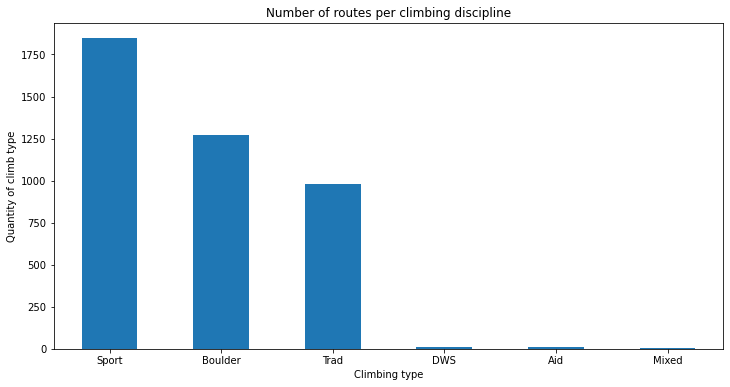

In [31]:
disciplines = ['Sport', 'Boulder', 'Trad', 'DWS', 'Aid', 'Mixed']

ax = routes['Type'].value_counts().plot(kind='bar',
                                       figsize=(12,6),
                                       title='Number of routes per climbing discipline')
ax.set_xlabel('Climbing type')
ax.set_ylabel('Quantity of climb type')

ax.set_xticklabels(disciplines, rotation=0)

### Let's see distribution of grades for the bouldering and sport climbing

#### First, bouldering

In [32]:
grade_count = routes['Grade'].value_counts()

grade_count.head(10)

7a+    166
6b+    151
6b     148
6c     147
6a     145
7a     144
f5+    139
f6A    135
7b     123
6a+    122
Name: Grade, dtype: int64

In [33]:
boulders = routes[routes['Type']=='B'].groupby(['Grade'])['Name'].count()
boulders.head(15)

Grade
V0     2
V0-    2
V1     4
V11    1
V12    1
V2     8
V3     1
V4     1
V4+    1
V5     2
V6     1
V9     1
VB     2
f2     2
f2+    1
Name: Name, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

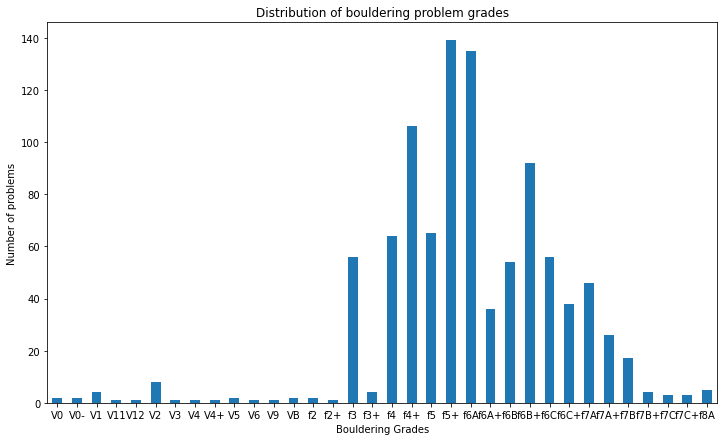

In [34]:
ax = boulders.plot(kind='bar',
                                       figsize=(12,7),
                                       title='Distribution of bouldering problem grades')
ax.set_xlabel('Bouldering Grades')
ax.set_ylabel('Number of problems')
plt.xticks(rotation=0)

#### Now sport climbing

In [35]:
sport_grades = routes[routes['Type']=='G'].groupby(['Grade'])['Name'].count()
sport_grades

Grade
1           1
2a          9
2c         11
3a         30
3b          5
3c         26
4a         37
4b          8
4c         55
4c S0       1
5a         61
5a S2       1
5b         14
5c         90
6a        144
6a+       121
6a+ S1      3
6b        148
6b+       151
6b+ S0      1
6c        147
6c S3       2
6c+       108
7a        144
7a+       166
7a+ S1      1
7b        123
7b+       116
7c         67
7c+        39
8a          7
8a+         6
8b          3
8c          1
Name: Name, dtype: int64

In [36]:
sport = routes[(routes['Type']=='G') & (~routes['Grade'].str.contains('S'))]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

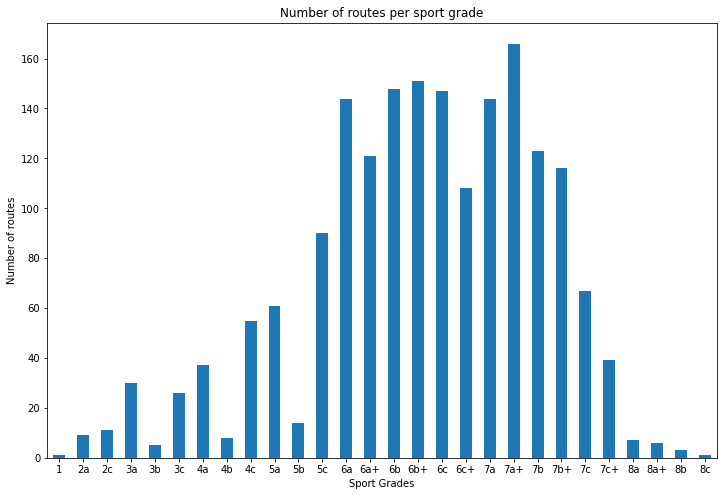

In [37]:
ax = sport.groupby(['Grade'])['Name'].count().plot(kind='bar',
                                       figsize=(12,8),
                                       title='Number of routes per sport grade')
ax.set_xlabel('Sport Grades')
ax.set_ylabel('Number of routes')
plt.xticks(rotation=0)

### Which crags to choose?
My friend and I would like to climb 7a this trip. I will filter the crags by the number of 7a routes.

#### First let's see the distribution of logs for 7a climbs and see if there is a clear cut off point

In [38]:
sport[sport['Grade']=='7a'].sort_values(by='Logs', ascending=False)

,Name,Grade,Stars,Type,Logs,Unnamed: 7,Crag
914,Sacred Angel,7a,2,G,534,R,Blacknor South
945,To Wish the Impossible,7a,3,G,529,R,Blacknor South
944,Medusa Falls,7a,3,G,528,R,Blacknor South
1571,The Accelerator,7a,1,G,516,R,Cheyne Weares Area
856,Wolfgang Forever,7a,2,G,468,R,Blacknor North
3421,Haute Cuisine,7a,2,G,387,R,The Cuttings
4198,Peppercorn Rate,7a,2,G,368,R,Winspit
12,Jurassic Shift,7a,2,G,352,R,Battleship Back Cliff
3406,The Holy Hand Grenade,7a,2,G,337,R,The Cuttings
854,Is Vic There?,7a,2,G,326,R,Blacknor North


Text(0, 0.5, 'Number of logs')

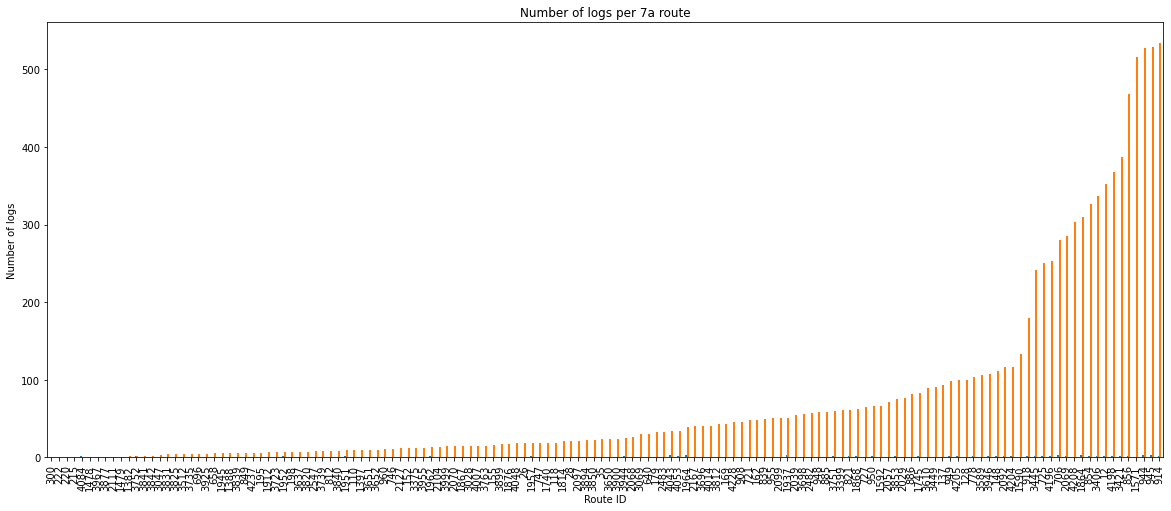

In [39]:
# let's see the distribution of routes per grade that have been logged at least 100 times
ax = sport[sport['Grade']=='7a'].sort_values(by='Logs').plot(kind='bar',
                                       figsize=(20,8),
                                       title='Number of logs per 7a route',
                                                             legend=False)
ax.set_xlabel('Route ID')
ax.set_ylabel('Number of logs')

In [40]:
routes_over_100 = sport[sport['Logs']>100].groupby(['Grade'])['Name'].count()
routes_over_100.head()

Grade
1      1
2a     3
2c     5
3a    21
3c    17
Name: Name, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text major ticklabel objects>)

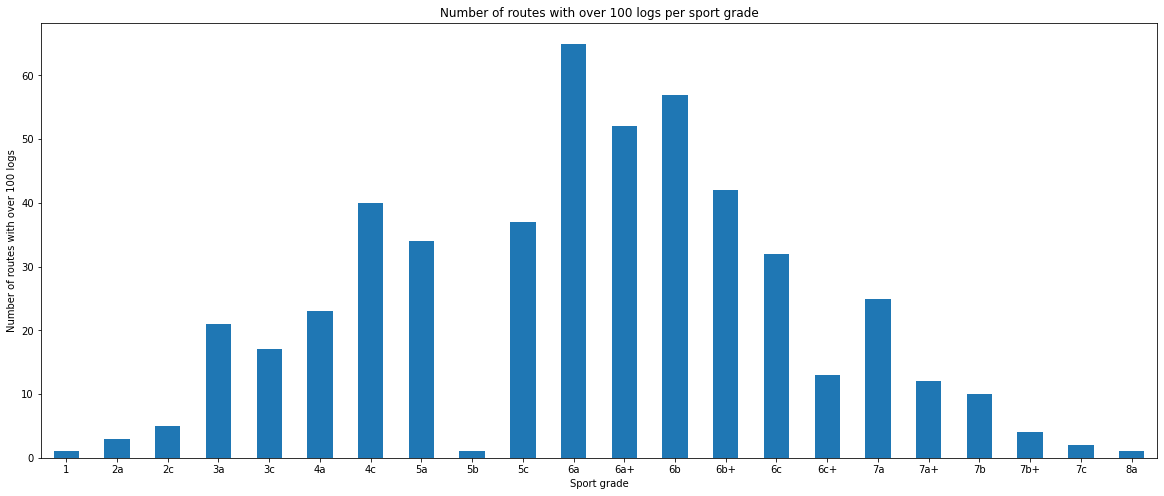

In [41]:
# let's see the distribution of routes per grade that have been logged at least 100 times
ax = routes_over_100.plot(kind='bar',
                                       figsize=(20,8),
                                       title='Number of routes with over 100 logs per sport grade',
                                                             legend=False)
ax.set_xlabel('Sport grade')
ax.set_ylabel('Number of routes with over 100 logs')
plt.xticks(rotation=0)

In [99]:
# how many 6c+ & 7a routes have been logged at least 100 times?

num_6cplus_100_logs = sport[(sport['Grade']=='6c+') & (sport['Logs'] > 100)]['Name'].count()
num_7a_100_logs = sport[(sport['Grade']=='7a') & (sport['Logs'] > 100)]['Name'].count()

print('There are {} 6c+ climbs with over 100 logs on UKC'.format(num_6cplus_100_logs))
print('There are {} 7a climbs with over 100 logs on UKC'.format(num_7a_100_logs))

There are 13 6c+ climbs with over 100 logs on UKC
There are 25 7a climbs with over 100 logs on UKC


In [100]:
popular_7a_routes_100_logs = sport[(sport['Grade']=='7a') & (sport['Logs'] > 100)].sort_values(by='Logs', ascending=False)
popular_7a_routes_100_logs

,Name,Grade,Stars,Type,Logs,Unnamed: 7,Crag
914,Sacred Angel,7a,2,G,534,R,Blacknor South
945,To Wish the Impossible,7a,3,G,529,R,Blacknor South
944,Medusa Falls,7a,3,G,528,R,Blacknor South
1571,The Accelerator,7a,1,G,516,R,Cheyne Weares Area
856,Wolfgang Forever,7a,2,G,468,R,Blacknor North
3421,Haute Cuisine,7a,2,G,387,R,The Cuttings
4198,Peppercorn Rate,7a,2,G,368,R,Winspit
12,Jurassic Shift,7a,2,G,352,R,Battleship Back Cliff
3406,The Holy Hand Grenade,7a,2,G,337,R,The Cuttings
854,Is Vic There?,7a,2,G,326,R,Blacknor North


In [104]:
crags_with_popular_7a = pd.DataFrame(popular_7a_routes_100_logs.groupby(['Crag'])['Name'].count().sort_values(ascending=False))
crags_min_two_popular_7a = crags_with_popular_7a[crags_with_popular_7a['Name'] > 1]
crags_min_two_popular_7a

,Name
Crag,
Winspit,4
Blacknor South,4
The Cuttings,3
Dancing Ledge,2
Cheyne Weares Area,2
Blacknor North,2
Blacknor Central,2


## 6) Conclusion

Based on this data analysis we will be going to Blacknor South, Winspit, and Cheyne Weares Area, as on our last and first trip, we went to The Cuttings and Blacknor Central.


7a routes to try are:
- Blacknor South:
    - Sacred Angel ** 15m (Easy up to ledge, then fingery crux with pockets)
    - To Wish the Impossible *** 20m (sustained with delicate & fingery climbing, lots of rests, big moves off jugs)
- Winspit
    - Peppercorn Rate ** 20m (tough and pumpy with a blind crack)
    - Exuberence * 20m (one hard bit at top, not so many onsightsbut alot of redpoints)
    - Ancient order of Freemarblers ** 20m (steep stamina climbing, decent proportion of onsights)
    - Gallows' Gore ** 20m (crux at the middle, either fingery or pull hard, can be onsightable by a boulderer)
    - Agonies of a Dying Mind * 20m (powerful start about a V3/V4, but high rate of onsight and redpoints)
- Cheyne Weares Area
    - The Accelerator * 7m (sounds super soft and pump shouldn't be a factor!)


I will report back to say whether it was a mission success or not :)